In [1]:
import pyreadr
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import sympy
from scipy.stats import norm, expon, uniform, t

## Úkol 1
* (1b) Načtěte datový soubor a rozdělte sledovanou proměnnou na příslušné dvě pozorované skupiny. Stručně popište data a zkoumaný problém. Pro každu skupinu zvlášť odhadněte střední hodnotu, rozptyl a medián příslušného rozdělení.

Načtu si dataset.

In [2]:
file = pyreadr.read_r('case0202.rda')
df = file["case0202"]

In [3]:
df.head()

,Unaffect,Affected
rownames,,
1,1.94,1.27
2,1.44,1.63
3,1.56,1.47
4,1.58,1.39
5,2.06,1.93


Odstraním zbytečný sloupec, přidám index a prohlédnu si data.

In [4]:
df.reset_index(inplace=True)
df.drop(columns="rownames", inplace=True)
display(df)
display(df.describe())

,Unaffect,Affected
0,1.94,1.27
1,1.44,1.63
2,1.56,1.47
3,1.58,1.39
4,2.06,1.93
5,1.66,1.26
6,1.75,1.71
7,1.77,1.67
8,1.78,1.28
9,1.92,1.85


,Unaffect,Affected
count,15.000000,15.000000
mean,1.758667,1.560000
std,0.242424,0.301259
min,1.250000,1.020000
25%,1.600000,1.310000
50%,1.770000,1.590000
75%,1.935000,1.780000
max,2.080000,2.020000


Dataset obsahuje záznamy 15 párů dvojčat, kde jedno z dvojčat mělo schizofrenii a druhé ne (*Unaffect*/*Affected*). U každého dvojčete byla změřena velikost hipokampu (části mozku) v cm<sup>3</sup>. Otázkou je, jestli se tyto hodnoty liší u lidí se schizofrenií a u lidí bez.

Rozdělím si dataset na jednotlivé skupiny.

In [5]:
unaffect = df["Unaffect"]
affected = df["Affected"]

Teď odhadnu střední hodnotu, rozptyl a medián.

Odhadem střední hodnoty je aritmetický průměr:
$$
\bar{X}_n = \frac{1}{n} \sum_{i=1}^n X_i,
$$

In [6]:
print(f"Odhad střední hodnoty Unaffect: {round(unaffect.mean(), 4)}")
print(f"Odhad střední hodnoty Affected: {round(affected.mean(), 4)}")

Odhad střední hodnoty Unaffect: 1.7587
Odhad střední hodnoty Affected: 1.56


Výběrový rozptyl:
$$
s_n^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X}_n)^2,
$$

In [7]:
print(f"Odhad rozptylu Unaffect: {round(unaffect.var(), 4)}")
print(f"Odhad rozptylu Affected: {round(affected.var(), 4)}")

Odhad rozptylu Unaffect: 0.0588
Odhad rozptylu Affected: 0.0908


Medián:

In [8]:
print(f"Medián Unaffect: {round(unaffect.median(), 4)}")
print(f"Medián Affected: {round(affected.median(), 4)}")

Medián Unaffect: 1.77
Medián Affected: 1.59


## Úkol 2

* (1b) Pro každou skupinu zvlášť odhadněte hustotu a distribuční funkci pomocí histogramu a empirické distribuční funkce.

[Text(0.5, 1.0, 'Odhad distribuční funkce Affected')]

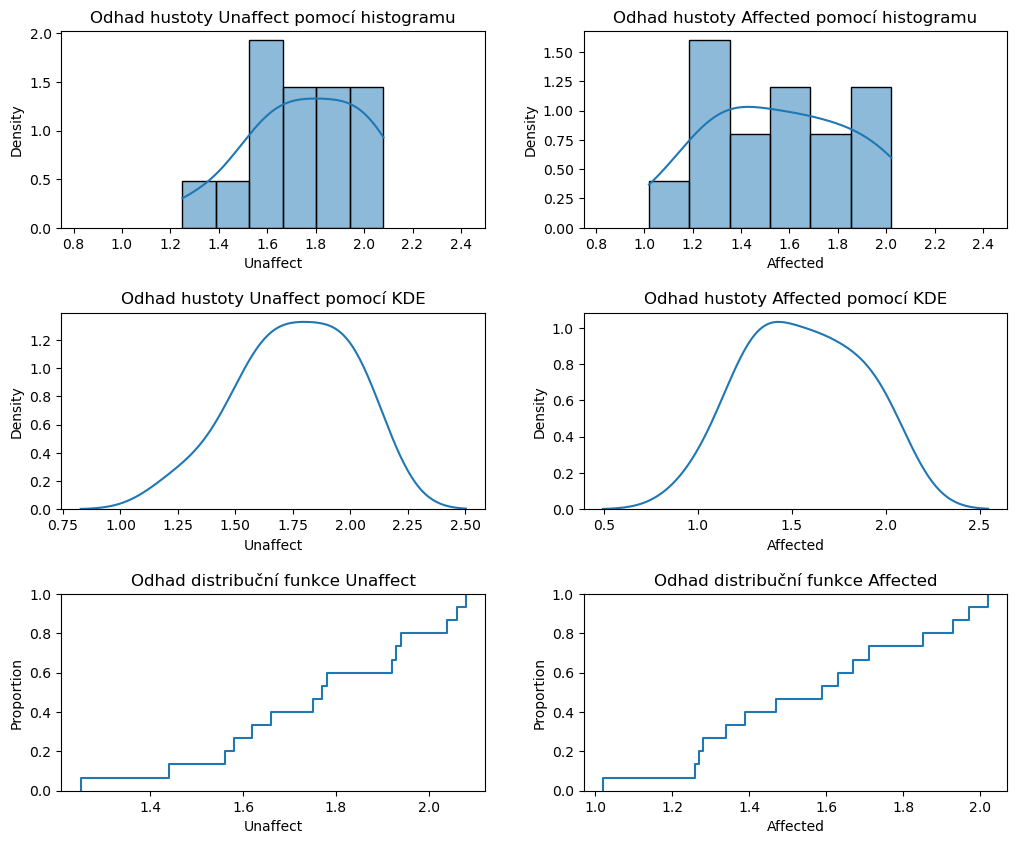

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(11, 9))
fig.tight_layout(pad=4)

#odhad hustoty unaffect histogramem
sns.histplot(
    data=unaffect, stat='density', kde=True, bins=6, ax=axes[0, 0]
).set(
    title="Odhad hustoty Unaffect pomocí histogramu", xlim=(.75, 2.5))
#odhad hustoty affected histogramem
sns.histplot(
    data=affected, stat='density', kde=True, bins=6, ax=axes[0, 1]
).set(title="Odhad hustoty Affected pomocí histogramu", xlim=(.75, 2.5))
#displot unaffect
sns.kdeplot(
    data=unaffect, ax=axes[1, 0]
).set(title="Odhad hustoty Unaffect pomocí KDE")
#displot affected
sns.kdeplot(
    data=affected, ax=axes[1, 1]
).set(title="Odhad hustoty Affected pomocí KDE")
#odhad distribucni funkce unaffect
sns.ecdfplot(
    data=unaffect, ax=axes[2, 0]
).set(title="Odhad distribuční funkce Unaffect")
#odhad distribucni funkce affected
sns.ecdfplot(
    data=affected, ax=axes[2, 1]
).set(title="Odhad distribuční funkce Affected")

15 záznamů je docela málo a odhady proto nemusí být úplně přesné. Hustotu jsem kromě histogramu odhadl i pomocí *kdeplotu*, kde je vidět lépe.

## Úkol 3
* (3b) Pro každou skupinu zvlášť najděte nejbližší rozdělení: Odhadněte parametry normálního, exponenciálního a rovnoměrného rozdělení. Zaneste příslušné hustoty s odhadnutými parametry do grafů histogramu. Diskutujte, které z rozdělení odpovídá pozorovaným datům nejlépe.

unaffected:
Odhad lambdy pro exponenciální rozdělení: 0.5686
Odhad střední hodnoty pro normální rozdělení: 1.759
Odhad rozptylu pro normální rozdělení: 0.05877
Odhad intervalu [a, b] pro uniformní rozdělení: [1.353, 2.164]


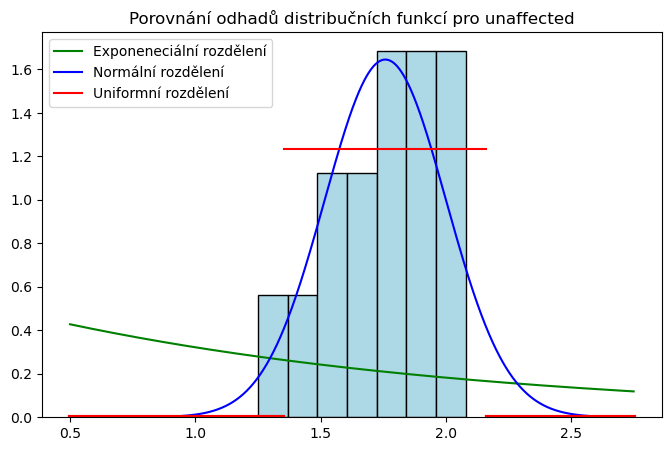

In [10]:
def get_distribution_estimates(vector, title):
    n = vector.shape[0]

    m1 = vector.mean()
    m2 = 1/n * sum(vector.apply(lambda x: x**2))

    x = np.linspace(0.5, 2.75, 1000)
    plt.figure(figsize=(8, 5))
    plt.hist(vector, density=True, bins=7, color='lightblue', edgecolor='black')

    # Odhad lambda pro Exponenciální rozdělení
    lambda_est = 1/m1
    
    plt.plot(x, expon.pdf(x, scale=1/lambda_est), color='green', label="Exponeneciální rozdělení")

    # Odhad střední hodnoty a rozptylu Normálního rozděleni
    ex = m1
    sd = math.sqrt(vector.var())

    plt.plot(x, norm.pdf(x, loc=ex, scale=sd), color='blue', label="Normální rozdělení")

    # Odhad parametrů Uniformního rozdělení
    a, b = sympy.symbols("a b", real=True)

    eq1 = sympy.Eq((a+b)/2, m1)
    eq2 = sympy.Eq(((b-a)**2)/12, m2 - m1**2)

    a, b = sympy.solve([eq1, eq2])[0].values()
    a, b = float(a), float(b)

    uniform_y = uniform.pdf(x, a, b - a)

    a_pos = 0
    b_pos = 0

    for i in range(len(uniform_y)):
        if uniform_y[i] != 0 and a_pos == 0:
            a_pos = i
        if a_pos != 0 and uniform_y[i] == 0 and b_pos == 0:
            b_pos = i

    plt.plot(x[a_pos:b_pos], uniform_y[a_pos:b_pos], color='r', label="Uniformní rozdělení")
    plt.plot(x[:a_pos], uniform_y[:a_pos], color='r', linewidth=3)
    plt.plot(x[b_pos:], uniform_y[b_pos:], color='r', linewidth=3)
    plt.title("Porovnání odhadů distribučních funkcí pro " + title)
    plt.legend()

    print(f"{title}:")
    print(f"Odhad lambdy pro exponenciální rozdělení: {lambda_est:.4}")
    print(f"Odhad střední hodnoty pro normální rozdělení: {ex:.4}")
    print(f"Odhad rozptylu pro normální rozdělení: {sd**2:.4}")
    print(f"Odhad intervalu [a, b] pro uniformní rozdělení: [{a:.4}, {b:.4}]")

get_distribution_estimates(unaffect, "unaffected")


Exponenciální rozdělení rozhodně datům neodpovídá. Uniformní také spíše ne. Nejvíce sedí normální rozdělení.

affected:
Odhad lambdy pro exponenciální rozdělení: 0.641
Odhad střední hodnoty pro normální rozdělení: 1.56
Odhad rozptylu pro normální rozdělení: 0.09076
Odhad intervalu [a, b] pro uniformní rozdělení: [1.056, 2.064]


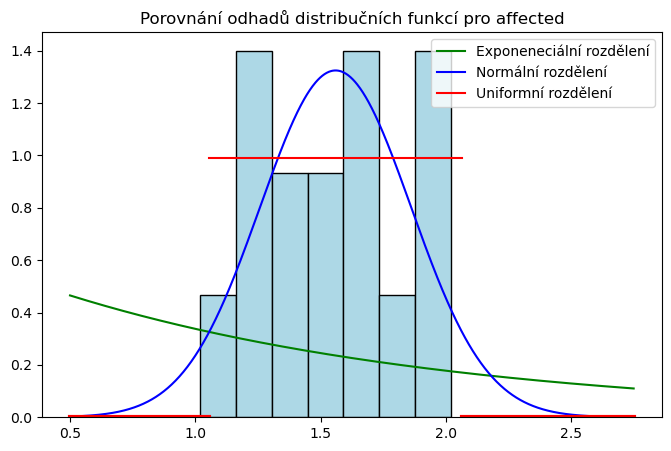

In [11]:
get_distribution_estimates(affected, "affected")

Zde opět můžeme vyřadit exponenciální rozdělení. Z obrázku není patrné zda je lepší uniformní nebo normální rozdělení, ale jedná se o velikost hipokampu, která by měla být rozdělena normálně, takže se přikloníme k normálnímu rozdělení.

## Úkol 4

* (1b) Pro každou skupinu zvlášť vygenerujte náhodný výběr o 100 hodnotách z rozdělení, které jste zvolili jako nejbližší, s parametry odhadnutými v předchozím bodě. Porovnejte histogram simulovaných hodnot s pozorovanými daty.

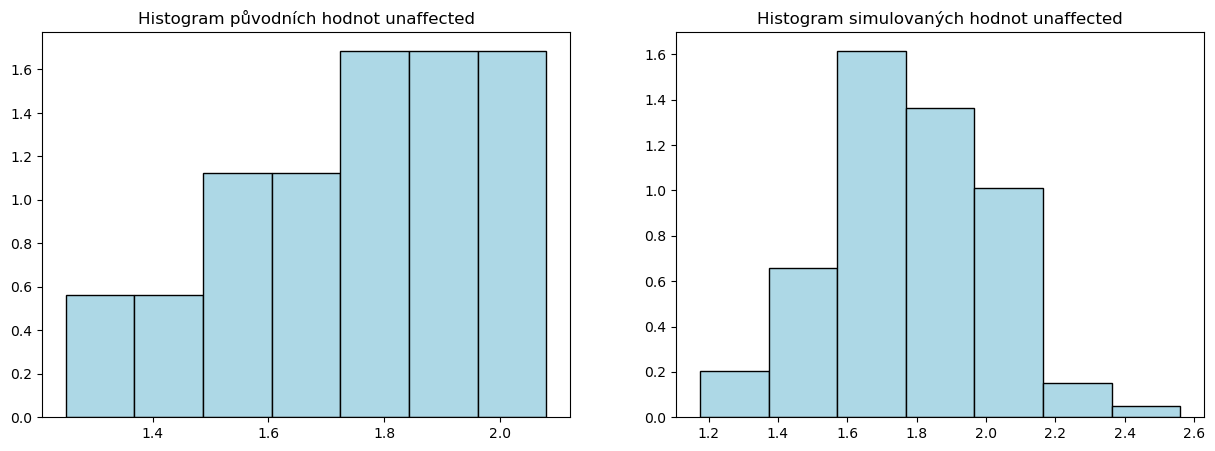

In [12]:
def compare(vector, title):
    n = vector.shape[0]

    m1 = vector.mean()
    m2 = 1/n * sum(vector.apply(lambda x: x**2))

    x = np.linspace(0, 4, 1000)

    ex = m1
    sd = math.sqrt(vector.var())

    selection = np.random.normal(ex, sd, 100)

    f, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].hist(vector, density=True, bins=7, color='lightblue', edgecolor='black')
    ax[1].hist(selection, density=True, bins=7, color='lightblue', edgecolor='black')
    ax[0].set_title(f"Histogram původních hodnot {title}")
    ax[1].set_title(f"Histogram simulovaných hodnot {title}")

compare(unaffect, "unaffected")

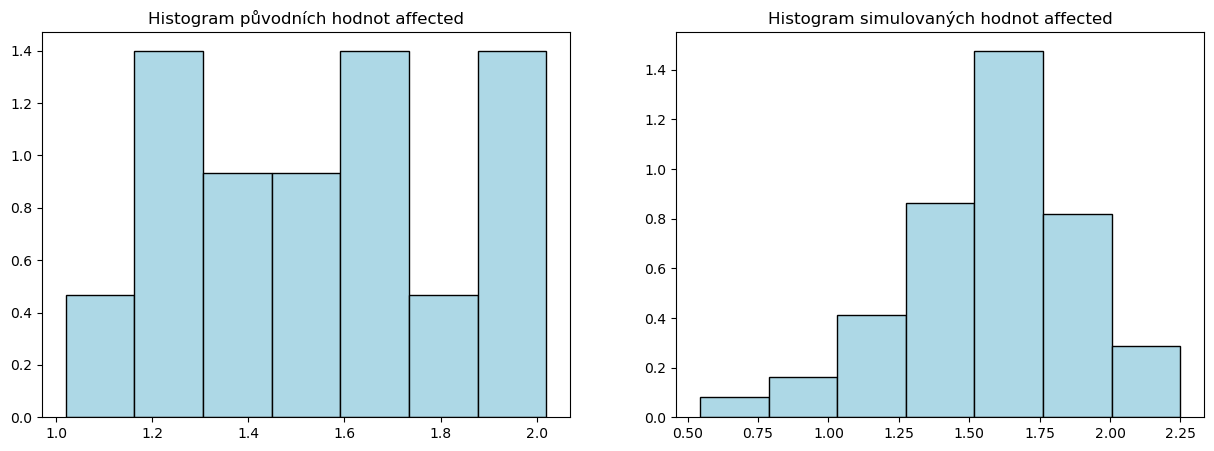

In [13]:
compare(affected, "affected")

Histogramy simulovaných hodnot a pozorovaných dat se hlavně u *affected* docela výrazně liší. Důvod bude opět pravděpodobně ten, že máme pouze 15 pozorovaných hodnot a z takto malého vzorku dat je obtížné přesně odhadnout dané rozdělení.

## Úkol 5

* (1b) Pro každou skupinu zvlášť spočítejte oboustranný 95% konfidenční interval pro střední hodnotu.

Jelikož neznáme rozptyl, pomůžeme si studentovým rozdělením a spočítáme interval pomocí vzorce:

 $\left(\bar{X}_n - \frac{t_{n-1}\left(\frac{\alpha}{2}\right) \cdot s}{\sqrt{n}}, \bar{X}_n + \frac{t_{n-1}\left(\frac{\alpha}{2}\right) \cdot s}{\sqrt{n}}\right)$ 

In [14]:
def confInterval(vector, alpha):
    m1 = vector.mean()
    n = vector.shape[0]
    sd = math.sqrt(vector.var())
    student = t.isf(alpha / 2, n - 1)
    
    val = (student * sd) / np.sqrt(n)
    return m1 - val, m1 + val

def displayConfInterval(vector, alpha, title):
    a, b = confInterval(vector, alpha)
    print(f"Oboustranný {int((1 - alpha)*100)}% konfidenční interval spolehlivosti pro střední hodnotu {title}:")
    print(f"({a:.4}, {b:.4})")

displayConfInterval(affected, 0.05, "affected")

Oboustranný 95% konfidenční interval spolehlivosti pro střední hodnotu affected:
(1.393, 1.727)


In [15]:
displayConfInterval(unaffect, 0.05, "unaffected")

Oboustranný 95% konfidenční interval spolehlivosti pro střední hodnotu unaffected:
(1.624, 1.893)


## Úkol 6

* (1b) Pro každou skupinu zvlášť otestujte na hladině významnosti 5 % hypotézu, zda je střední hodnota rovná hodnotě K (parametr úlohy), proti oboustranné alternativě. Můžete použít buď výsledek z předešlého bodu, nebo výstup z příslušné vestavěné funkce vašeho softwaru.

In [16]:
def hypothesis(K, vector, alpha):
    a, b = confInterval(vector, alpha)
    print(f"Testuji na hladině významnosti {alpha} hypotézu, že střední hodnota je rovna {K}, proti oboustranné alternativě.\n")
    print(f"Používaný konfidenční interval spolehlivosti: ({a:.4}, {b:.4})\n")
    if K < a or K > b:
        print(f"Hypotézu zamítáme ve prospěch alternativy, že střední hodnota není rovna {K}.")
    else:
        print("Hypotézu nezamítáme.")

K = 1.5        

print(f"Test pro unnaffected pro K = {K}:")
hypothesis(1.5, unaffect, 0.05)

Test pro unnaffected pro K = 1.5:
Testuji na hladině významnosti 0.05 hypotézu, že střední hodnota je rovna 1.5, proti oboustranné alternativě.

Používaný konfidenční interval spolehlivosti: (1.624, 1.893)

Hypotézu zamítáme ve prospěch alternativy, že střední hodnota není rovna 1.5.


In [17]:
print(f"Test pro affected pro K = {K}:")
hypothesis(1.5, affected, 0.05)

Test pro affected pro K = 1.5:
Testuji na hladině významnosti 0.05 hypotézu, že střední hodnota je rovna 1.5, proti oboustranné alternativě.

Používaný konfidenční interval spolehlivosti: (1.393, 1.727)

Hypotézu nezamítáme.


## Úkol 7
* (2b) Na hladině významnosti 5 % otestujte, jestli mají pozorované skupiny stejnou střední hodnotu. Typ testu a alternativy stanovte tak, aby vaše volba nejlépe korespondovala s povahou zkoumaného problému.

Jelikož páry dvojčat jsou mezi sebou nezávislé, ale samotná dvojčata v páru jsou závislá, použijeme párový t-test. Zajímá nás, jestli dvojčata postižená schizofrenií mají jinak velký hipokampus, než ta, co schizofrenii nemají. 

Vytvořím si nový sloupec hodnot *diff*, který bude odpovídat rozdílu velikostí hipokampu mezi dvojčaty v páru. Poté otestuji hypotézu, jestli střední hodnota tohoto nového sloupce je rovna 0.

$$
\begin{align}
&H_0: \mu_{diff} = 0 \\
&H_A: \mu_{diff} \ne 0.
\end{align}
$$

In [18]:
diff = affected - unaffect
hypothesis(0, diff, 0.05)

Testuji na hladině významnosti 0.05 hypotézu, že střední hodnota je rovna 0, proti oboustranné alternativě.

Používaný konfidenční interval spolehlivosti: (-0.3306, -0.0667)

Hypotézu zamítáme ve prospěch alternativy, že střední hodnota není rovna 0.


To, že střední hodnota rozdílu *diff* není rovna 0 nám tedy říká, že se střední hodnoty *affected* a *unaffected* nerovnají.